array([0.71987249])

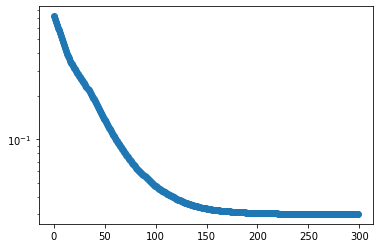

In [21]:
import numpy as np 
import matplotlib,pyplot as plt 

arr = np.load("outputs/__TEMP300_mismatch_6_3(0)_9_600_psi_MM_(S)(PR)(r).npy")[:300]
x = np.arange(len(arr))

plt.scatter(x,arr)
plt.yscale("log")
plt.show

arr[:1]

SyntaxError: invalid syntax (Temp/ipykernel_10084/1746439100.py, line 1)